midterm average:  48.959
final average:  72.73500000000001
midterm standard deviation:  9.697639867514155
final standard deviation:  16.574748112716527

100 iterations


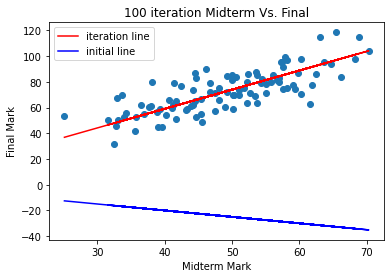

slope:  1.4885816943568566
y-int:  -0.46434047309782384



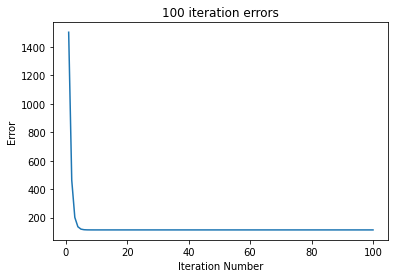


2000 iterations


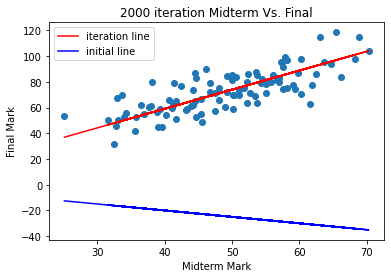

slope:  1.4862097308995343
y-int:  -0.34365709240395953



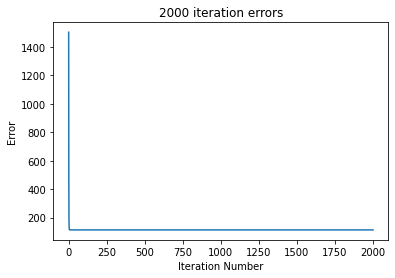


100 iterations standard


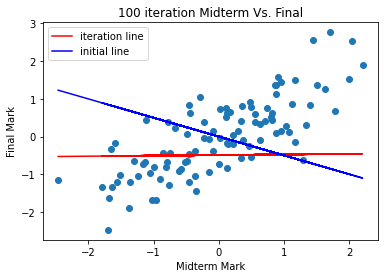

slope:  0.01531740993606835
y-int:  -0.49009835632497223



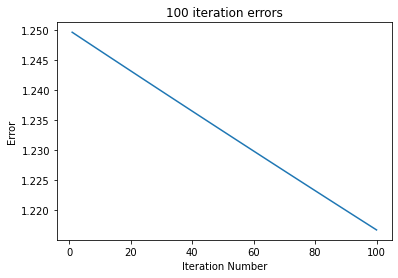


2000 iterations standard


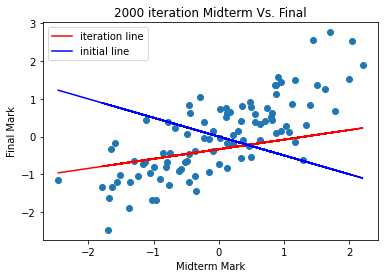

slope:  0.2550209802309297
y-int:  -0.33514661509730725



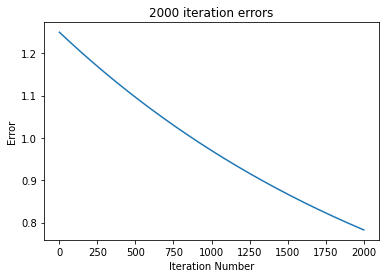

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the given URL
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")

# Extract the input features (midterm marks) and target variable (final marks) from the data
X = data["Midterm mark"].values
y = data["Final mark"].values

# Find mean value
midterm_average = sum(X) / len(X)
print("midterm average: ", midterm_average)

final_average = sum(y) / len(y)
print("final average: ", final_average)

# Find standard deviation
midterm_std = X.std()
print("midterm standard deviation: ", midterm_std)

final_std = y.std()
print("final standard deviation: ", final_std)

# Standardize data set
midterm_standardize = (X - midterm_average) / midterm_std
#print("standardized midterm :", midterm_standardize)

final_standardize = (y - final_average) / final_std
#print("standardized final: ", final_standardize)

# Define the cost function
def cost_function(X, y, theta):
    m = X.shape[0]
    y_pred = X.dot(theta)
    cost = (1/m) * np.sum(np.square(y_pred-y))
    return cost

# Define the gradient partial derivatives
def gradient_descent(X, y, theta, alpha):
    m = X.shape[0]
    y_pred = X.dot(theta)
    theta = theta - (2*alpha/m) * (X.T.dot(y_pred - y))
    return theta

# Add a column of ones to X to accommodate the bias term
X = np.c_[np.ones((X.shape[0], 1)), X]

# Reshape y to have the correct shape
y = y.reshape(-1,1)

# Initialize theta and alpha
theta = np.array([-0.5, 0]).reshape(-1,1)
alpha = 0.0001


# Set the number of iterations
num_iterations = 100

# Initialize a list to store the error at each iteration
errors = []

# Perform gradient descent and store the error at each iteration
for i in range(num_iterations):
    theta = gradient_descent(X, y, theta, alpha)
    errors.append(cost_function(X, y, theta))

# Extract m and b from theta
m = theta[1][0]
b = theta[0][0]

# Plot the data points and regression line
print("")
print("100 iterations")
plt.scatter(data["Midterm mark"], data["Final mark"])
plt.plot(data["Midterm mark"], m*data["Midterm mark"] + b, '-r', label = 'iteration line')
plt.plot(data["Midterm mark"], (-0.5)*data["Midterm mark"] + 0, '-b', label = 'initial line')
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.title("100 iteration Midterm Vs. Final")
plt.legend()
plt.show()
print("slope: ", m)
print("y-int: ", b)

# Plot the error at each iteration
print("")
plt.plot(range(1, num_iterations+1), errors)
plt.title("100 iteration errors")
plt.xlabel("Iteration Number")
plt.ylabel("Error")
plt.show()

#----------------------------------------
# Set the number of iterations
# reinitialize theta and alpha
theta = np.array([-0.5, 0]).reshape(-1,1)
alpha = 0.0001

num_iterations_new = 2000

# Initialize a list to store the error at each iteration
errors_new = []

# Perform gradient descent and store the error at each iteration
for i in range(num_iterations_new):
    theta = gradient_descent(X, y, theta, alpha)
    errors_new.append(cost_function(X, y, theta))

# Extract m and b from theta
m = theta[1][0]
b = theta[0][0]

# Plot the data points and regression line
print("")
print("2000 iterations")
plt.scatter(data["Midterm mark"], data["Final mark"])
plt.plot(data["Midterm mark"], m*data["Midterm mark"] + b, '-r', label = 'iteration line')
plt.plot(data["Midterm mark"], (-0.5)*data["Midterm mark"] + 0, '-b', label = 'initial line')
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.title("2000 iteration Midterm Vs. Final")
plt.legend()
plt.show()
print("slope: ", m)
print("y-int: ", b)

# Plot the error at each iteration
print("")
plt.plot(range(1, num_iterations_new+1), errors_new)
plt.title("2000 iteration errors")
plt.xlabel("Iteration Number")
plt.ylabel("Error")
plt.show()

#-----------------------------------
# Standardized
# Add a column of ones to X to accommodate the bias term
X = np.c_[np.ones((midterm_standardize.shape[0], 1)), midterm_standardize]

# Reshape y to have the correct shape
y = final_standardize.reshape(-1,1)

# Initialize theta and alpha
theta = np.array([-0.5, 0]).reshape(-1,1)
alpha = 0.0001


# Set the number of iterations
num_iterations = 100

# Initialize a list to store the error at each iteration
errors = []

# Perform gradient descent and store the error at each iteration
for i in range(num_iterations):
    theta = gradient_descent(X, y, theta, alpha)
    errors.append(cost_function(X, y, theta))

# Extract m and b from theta
m = theta[1][0]
b = theta[0][0]

# Plot the data points and regression line
print("")
print("100 iterations standard")
plt.scatter(midterm_standardize, final_standardize)
plt.plot(midterm_standardize, m*midterm_standardize + b, '-r', label = 'iteration line')
plt.plot(midterm_standardize, (-0.5)*midterm_standardize + 0, '-b', label = 'initial line')
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.title("100 iteration Midterm Vs. Final")
plt.legend()
plt.show()
print("slope: ", m)
print("y-int: ", b)

# Plot the error at each iteration
print("")
plt.plot(range(1, num_iterations+1), errors)
plt.title("100 iteration errors")
plt.xlabel("Iteration Number")
plt.ylabel("Error")
plt.show()

#---------------------------------------
# reinitialize theta and alpha
theta = np.array([-0.5, 0]).reshape(-1,1)
alpha = 0.0001

# Set the number of iterations
num_iterations = 2000

# Initialize a list to store the error at each iteration
errors = []

# Perform gradient descent and store the error at each iteration
for i in range(num_iterations):
    theta = gradient_descent(X, y, theta, alpha)
    errors.append(cost_function(X, y, theta))

# Extract m and b from theta
m = theta[1][0]
b = theta[0][0]

# Plot the data points and regression line
print("")
print("2000 iterations standard")
plt.scatter(midterm_standardize, final_standardize)
plt.plot(midterm_standardize, m*midterm_standardize + b, '-r', label = 'iteration line')
plt.plot(midterm_standardize, (-0.5)*midterm_standardize + 0, '-b', label = 'initial line')
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.title("2000 iteration Midterm Vs. Final")
plt.legend()
plt.show()
print("slope: ", m)
print("y-int: ", b)

# Plot the error at each iteration
print("")
plt.plot(range(1, num_iterations+1), errors)
plt.title("2000 iteration errors")
plt.xlabel("Iteration Number")
plt.ylabel("Error")
plt.show()

Question 1: Write your observations by changing the learning rate to 0.1

Answer 1: The original data becomes unuseable as many errors are produced, but the standardized data becomes more accurate. 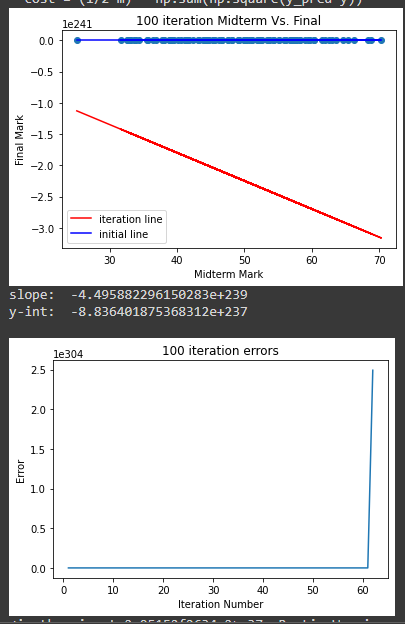
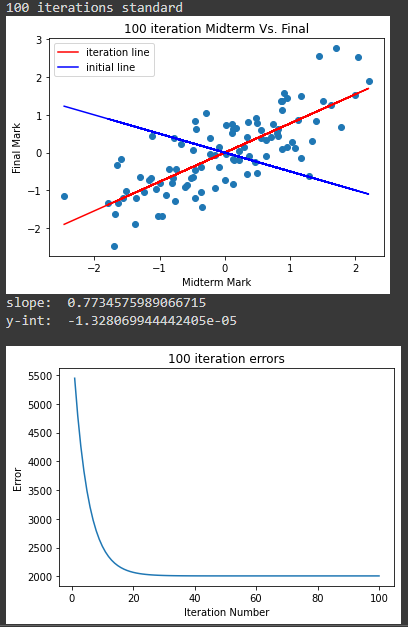

.

Question 2: Investigae the effect of standardization

Answer 2: Standardization centers the data around (0 , 0). This puts some of the data points in the negative axis